# PCA

In [11]:
packages<- c(
"dplyr",
"readr",
"tidyr",
"purrr",
"broom",
"magrittr",
"corrplot",
"caret",
"rpart",
"rpart.plot",
"e1071",
"torch",
"luz",
"ramify",
"keras"
)
sapply(packages, require, character.only=T)

Loading required package: ramify

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'ramify'"
Loading required package: keras

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'keras'"


dplyr      readr      tidyr      purrr      broom   magrittr   corrplot 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE       TRUE 
     caret      rpart rpart.plot      e1071      torch        luz     ramify 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE      FALSE 
     keras 
     FALSE

In [12]:
data<- tibble(
x1 = rnorm( 100 , mean = 0 ,sd = 1 ),
x2 = x1 +rnorm( 100 ,mean = 0 , sd =0.1),
x3 = x1 +rnorm( 100 ,mean = 0 , sd =0.1)
)
head(data) %>% knitr::kable()



|         x1|         x2|         x3|
|----------:|----------:|----------:|
| -0.2025153| -0.1452757| -0.0349280|
| -1.2143824| -1.2647917| -1.1685473|
| -0.0195263|  0.0103012| -0.0804237|
| -0.7540335| -0.6037637| -0.6296448|
|  1.1890876|  1.1752311|  1.1473636|
|  1.5101667|  1.5682724|  1.6790758|

Importance of components:
                          Comp.1     Comp.2       Comp.3
Standard deviation     1.7283493 0.10007402 0.0528561561
Proportion of Variance 0.9957305 0.00333827 0.0009312577
Cumulative Proportion  0.9957305 0.99906874 1.0000000000

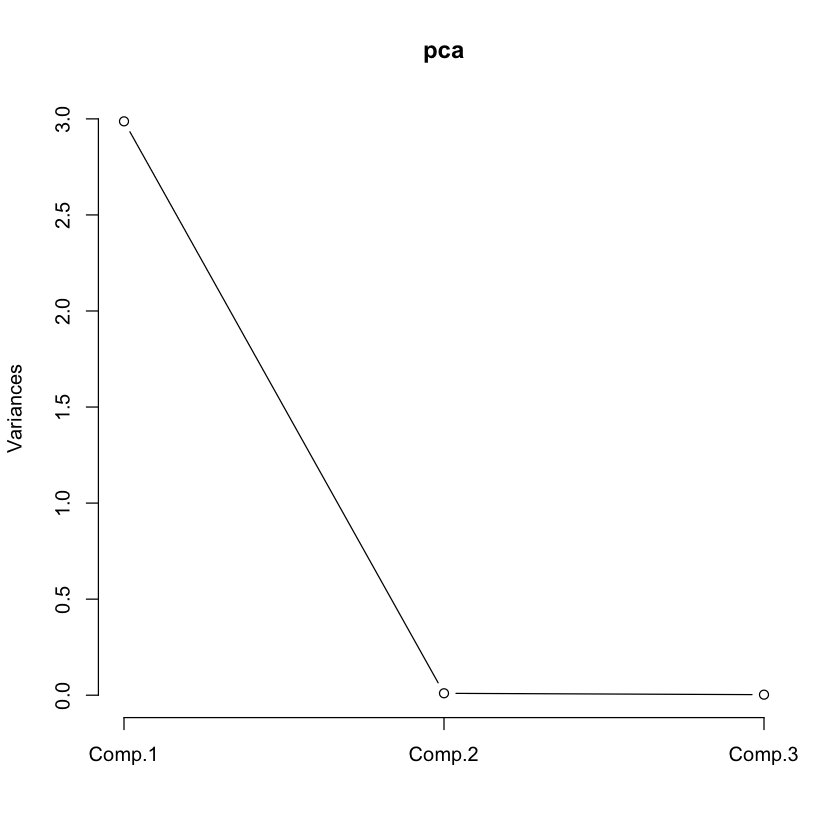

In [14]:
pca <- princomp(data, cor=TRUE)
summary(pca)
screeplot(pca, type = "l")

one way to interpret the principal components is to examine the
loadings, which are the weights that indicate the contribution of each
original variable to the creation of each principal component. A high
loading value indicates that a variable has a strong influence on that
principal component. As an extra fact, we understood that the principal
components can also be used for data reduction by selecting only the top
PCs that capture the majority of the variability in the data. This can
simplify the analysis and reduce the dimensionality of the data, while
still retaining the most important information.

In [15]:
pca$loadings


Loadings:
   Comp.1 Comp.2 Comp.3
x1  0.578  0.123  0.807
x2  0.577  0.637 -0.511
x3  0.577 -0.761 -0.297

               Comp.1 Comp.2 Comp.3
SS loadings     1.000  1.000  1.000
Proportion Var  0.333  0.333  0.333
Cumulative Var  0.333  0.667  1.000

\$loadings: each row represent the original variables and the columns
represent the principal components. Each element of the matrix
represents the loading of the corresponding variable on the
corresponding PC.

# PCregression

it is a regression technique that combines Principal Component Analysis
(PCA) and multiple linear regression. The way it works is that the
original predictor variables are transformed into a smaller set of
uncorrelated principal components (PCs) using PCA. The PCs are then used
as the predictors in a multiple linear regression model, instead of the
original variables. By reducing the dimensionality of the predictor
space, PCR can reduce the problem of multicollinearity and improve the
stability of the regression estimates.

use a historgram to represent the variance for each PC.

In [16]:
set.seed( 42 )
n<- 500
science<- rnorm(n, mean = 60 ,sd = 10 )
humanities <- rnorm(n, mean = 80 ,sd= 10 )
df <- tibble(
math = 0.8 * science+ rnorm(n, mean = 0 , sd = 7 ),
physics =1.0 * science +rnorm(n, mean = 0 , sd = 5 ),
chemistry = 1.3 *science +rnorm(n, mean = 0 ,sd = 3 ),
history =0.8 * humanities +rnorm(n, mean = 0 ,sd = 5 ),
geography = 1.0 *humanities + rnorm(n, mean = 0 ,sd = 10 ),
literature = 1.2* humanities +rnorm(n, mean = 0 ,sd = 2 )
)
df$gpa <- (0.9 *science +0.5 * humanities +rnorm(n, mean= 0 ,sd= 10 )) * 4 / 100
df %>%
head() %>%
round(digits= 2 )%>%
knitr::kable()



|  math| physics| chemistry| history| geography| literature|  gpa|
|-----:|-------:|---------:|-------:|---------:|----------:|----:|
| 75.24|   70.70|     96.57|   75.32|     83.43|     108.93| 4.40|
| 47.15|   53.67|     69.83|   71.30|     81.22|     104.37| 3.41|
| 57.70|   58.69|     77.55|   63.52|     75.91|      95.74| 3.76|
| 55.70|   70.49|     80.21|   67.09|     69.87|      97.45| 4.17|
| 44.26|   60.07|     79.38|   61.18|     83.96|      87.11| 2.96|
| 42.97|   60.64|     77.72|   62.33|     69.22|      91.86| 3.28|

Create a new data frame Z that contains the transformed (predicted) data
in the principal component space

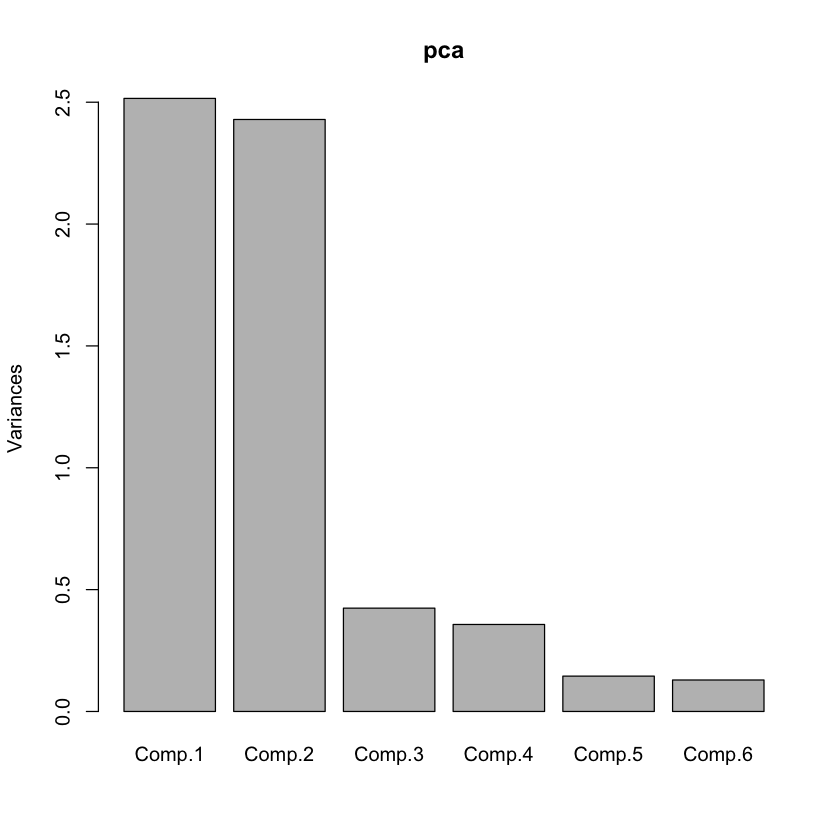

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     1.5860772 1.5585727 0.65113393 0.59751444 0.38083707
Proportion of Variance 0.4192735 0.4048581 0.07066257 0.05950392 0.02417281
Cumulative Proportion  0.4192735 0.8241316 0.89479419 0.95429811 0.97847093
                           Comp.6
Standard deviation     0.35940847
Proportion of Variance 0.02152907
Cumulative Proportion  1.00000000

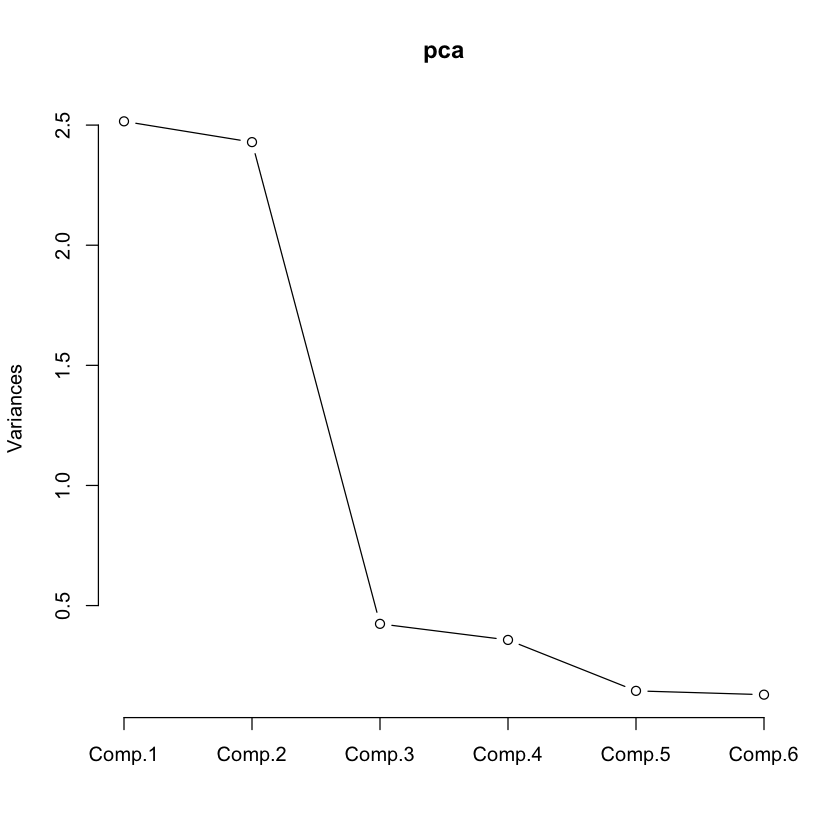

In [20]:
pca <- princomp(df %>% select(-gpa), cor=TRUE)
screeplot(pca)
screeplot(pca, type = "l")
summary(pca)

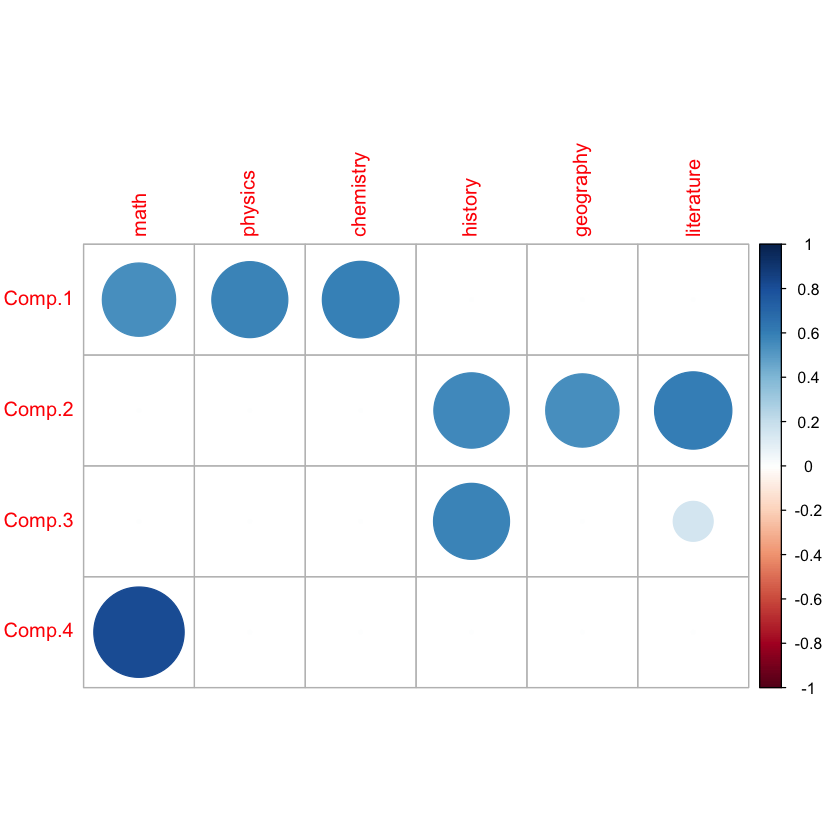

In [26]:

clean_loading <- ifelse(pca$loadings[, 1:4] < 0.1, 0, round(pca$loadings[, 1:4], 2)) %>% as.data.frame()
clean_loading %>% as.matrix() %>% t() %>% corrplot()


In [21]:
Z <- predict(pca, df) 
df_pca <- Z %>% as_tibble %>% select(Comp.1, Comp.2) %>% mutate(gpa = df$gpa)
df_pca


Comp.1,Comp.2,gpa
<dbl>,<dbl>,<dbl>
2.70377381,1.80787535,4.402650
-0.82432804,0.84294571,3.414104
0.47635843,-0.08509713,3.760019
1.10339233,0.05551303,4.166295
-0.01556033,-0.40923773,2.963712
-0.11975048,-0.67253535,3.282428
2.76140767,-0.44376750,4.211835
-1.40592754,-1.74948832,3.092054
3.18014280,-0.85577384,4.635809


In [28]:
mod <- lm(gpa ~ ., data = df_pca)
summary(mod)


Call:
lm(formula = gpa ~ ., data = df_pca)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.22601 -0.30774  0.01379  0.28813  1.25162 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.73356    0.01940  192.43   <2e-16 ***
Comp.1       0.17880    0.01223   14.62   <2e-16 ***
Comp.2       0.16893    0.01245   13.57   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4338 on 497 degrees of freedom
Multiple R-squared:  0.4446,	Adjusted R-squared:  0.4423 
F-statistic: 198.9 on 2 and 497 DF,  p-value: < 2.2e-16


The resulting table shows the values of the first two principal
components (Comp.1 and Comp.2) along with the corresponding GPA values.
This table can be used to visualize the relationship between GPA and the
first two principal components.